# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
# Load the dataset
try:
    df = pd.read_csv('E:\ML_PROJECT_NIDA\Eksperimen_SML_Nida\housing_raw\Bengaluru_House_Data.csv') 
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")

# Basic info
print("\nDataset Info:")
df.info()

# Statistical summary
print("\nStatistical Summary:")
display(df.describe(include='all'))

Dataset loaded successfully!
Shape: (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB

Statistical Summary:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

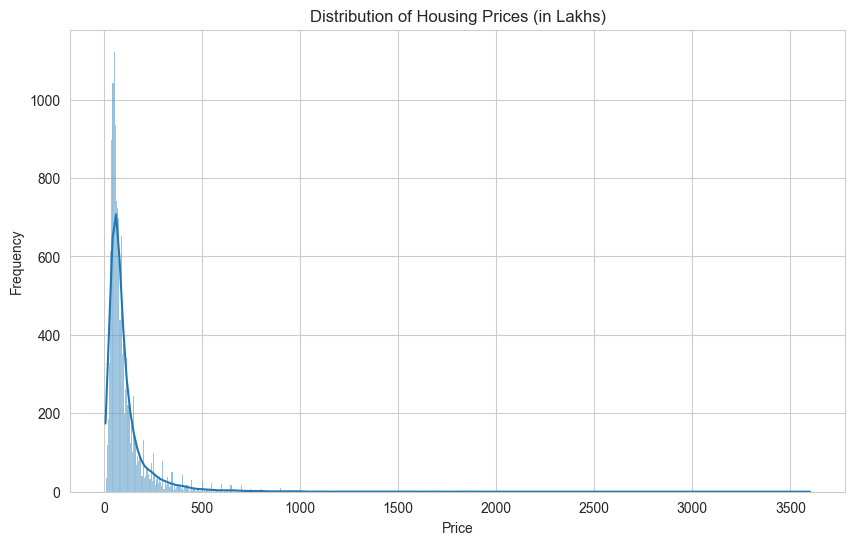

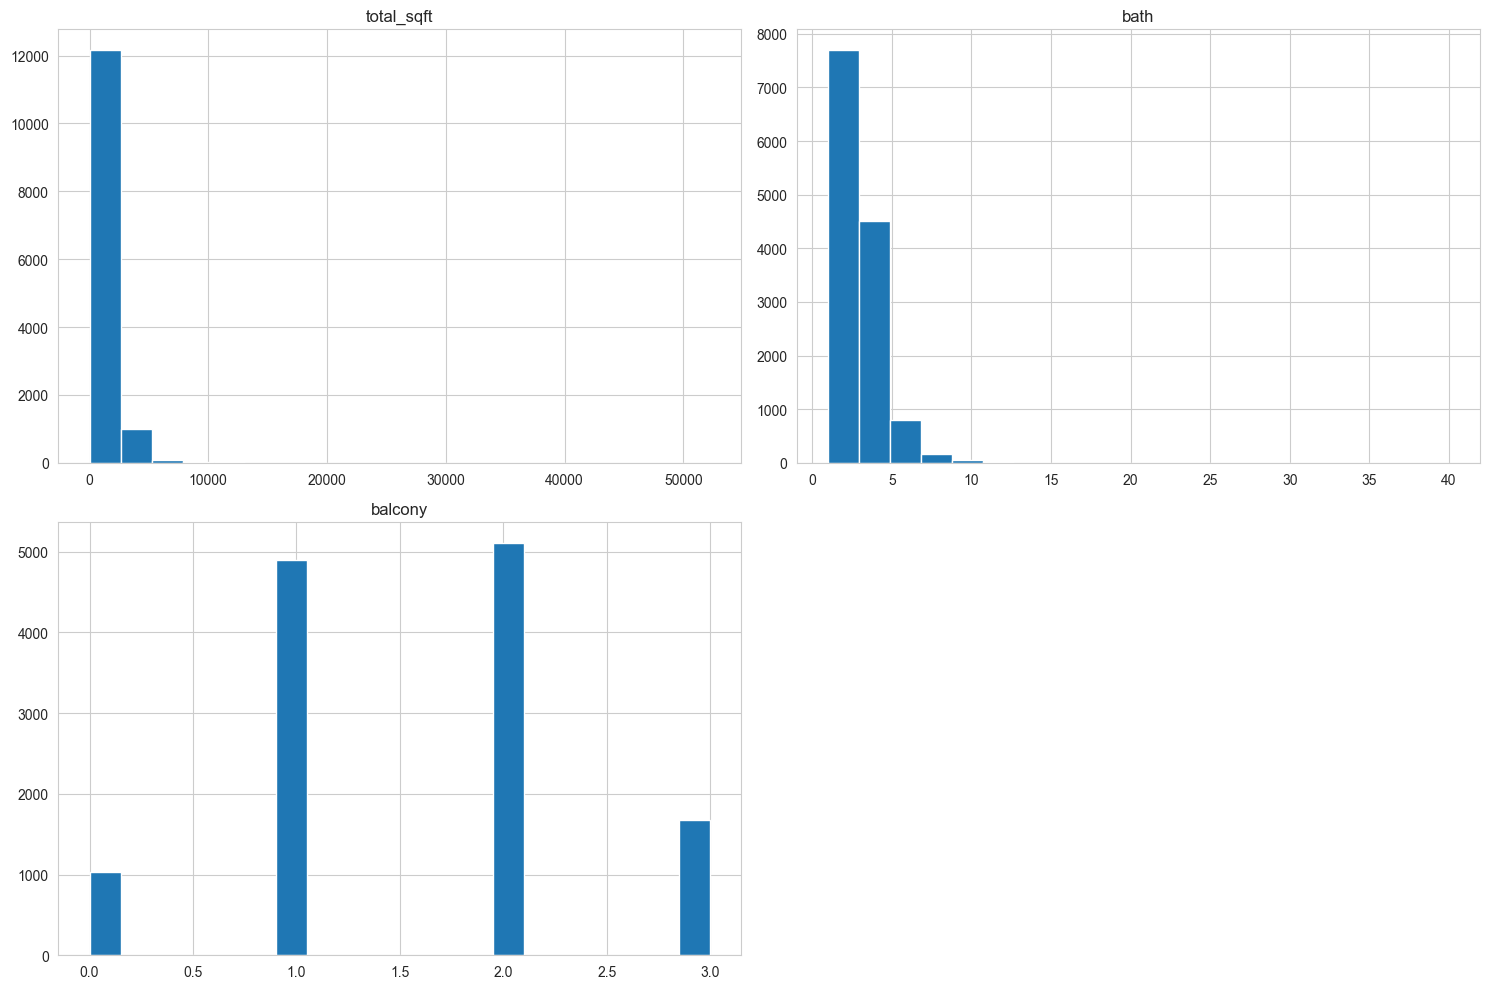

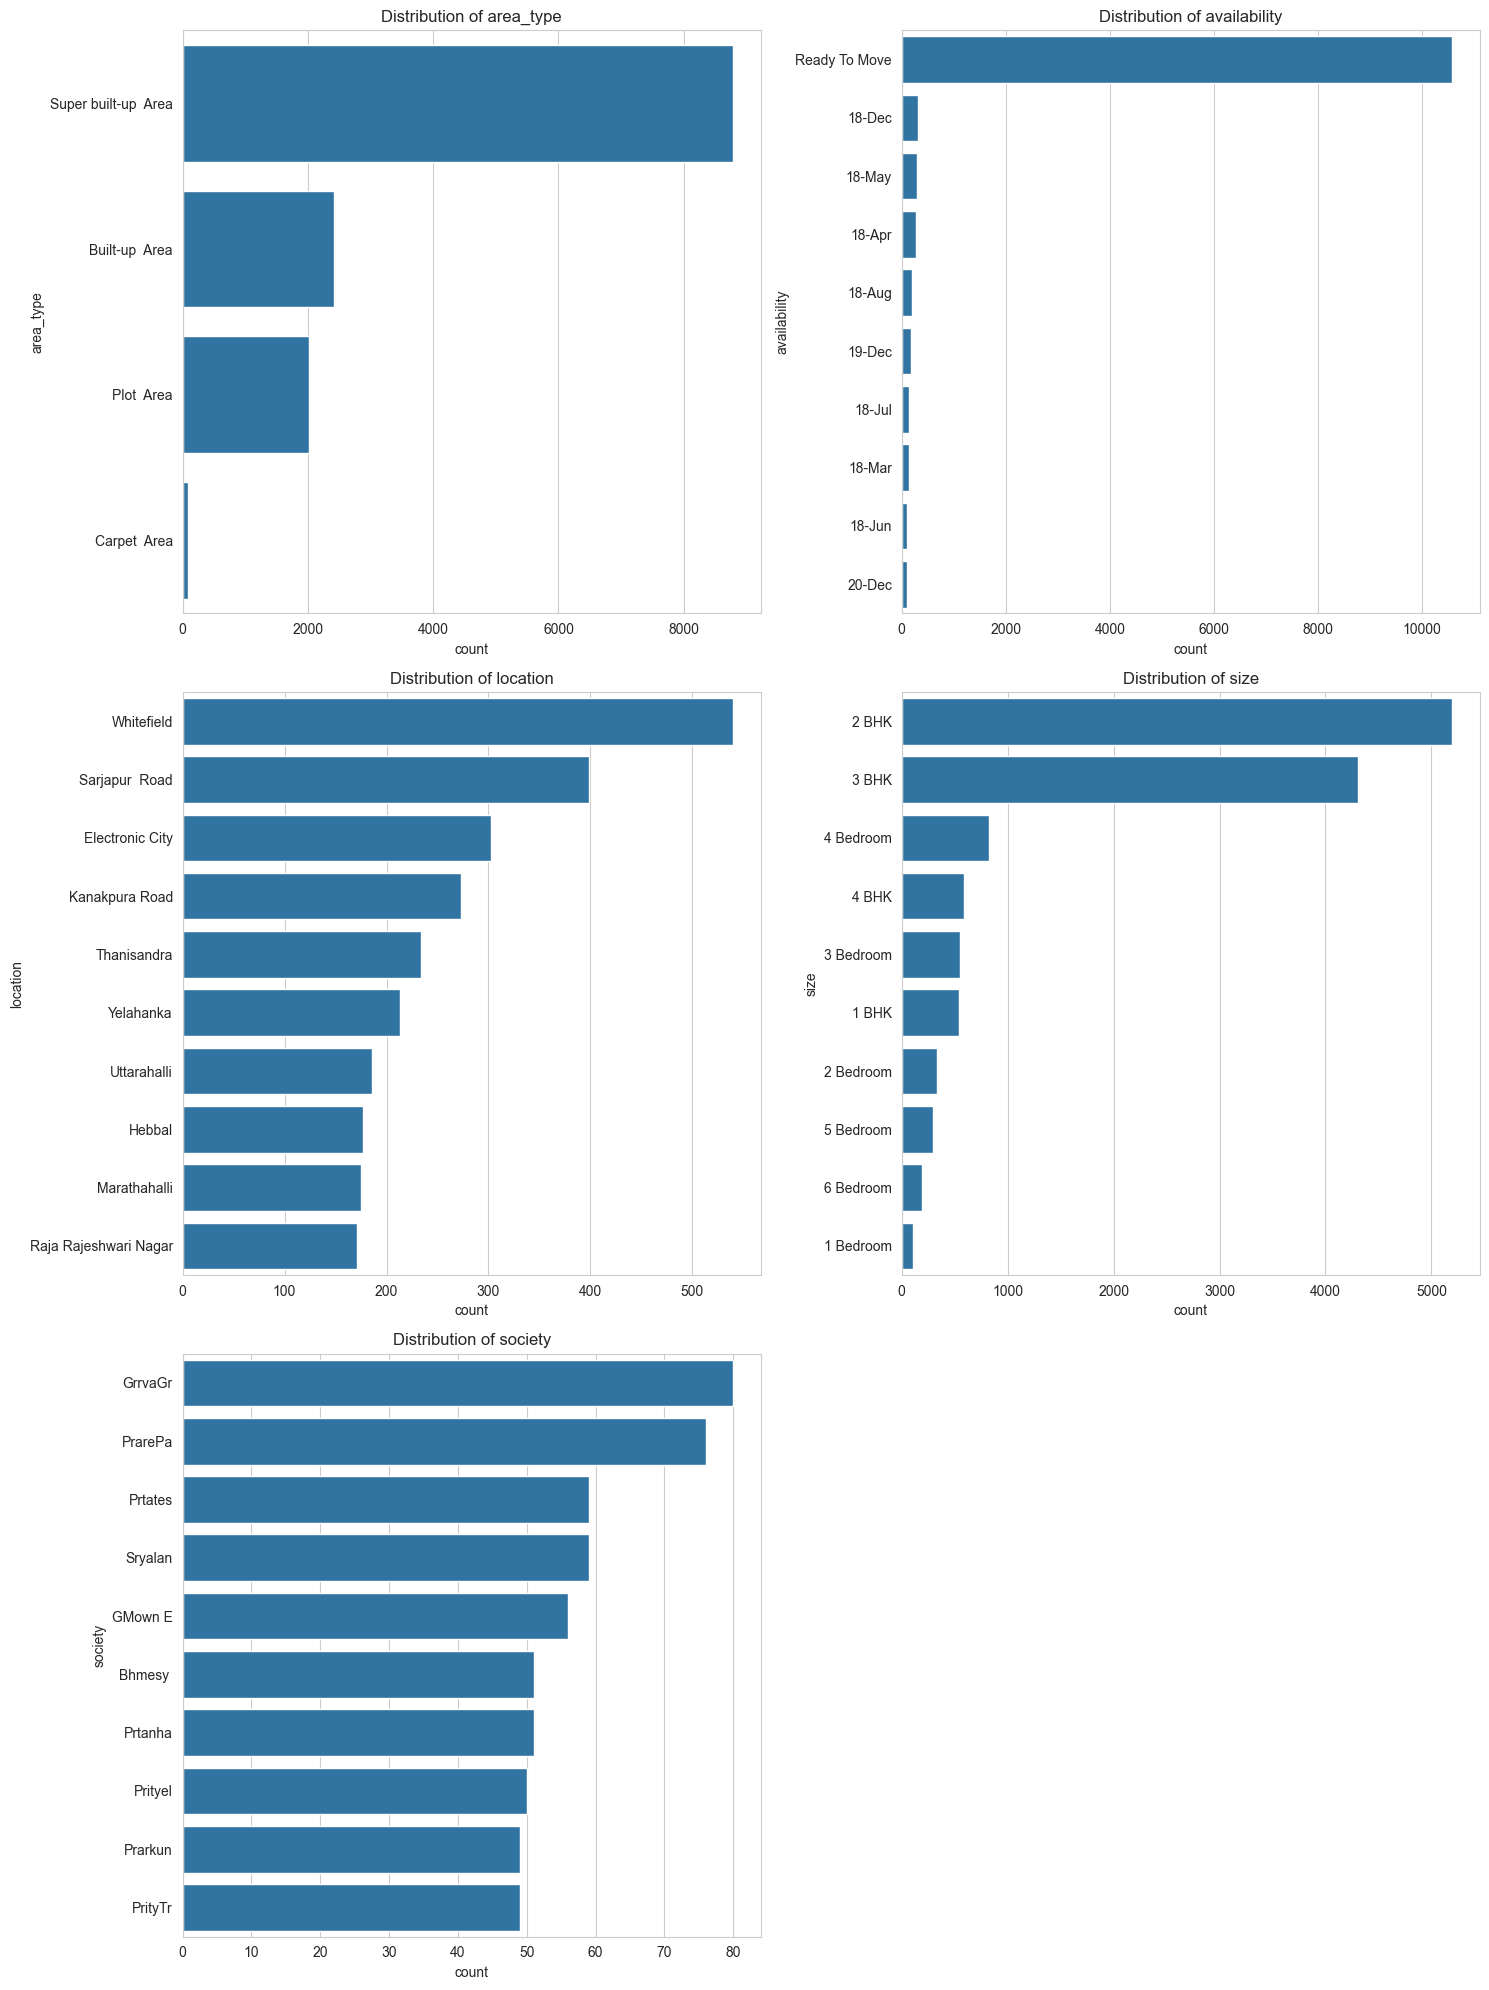

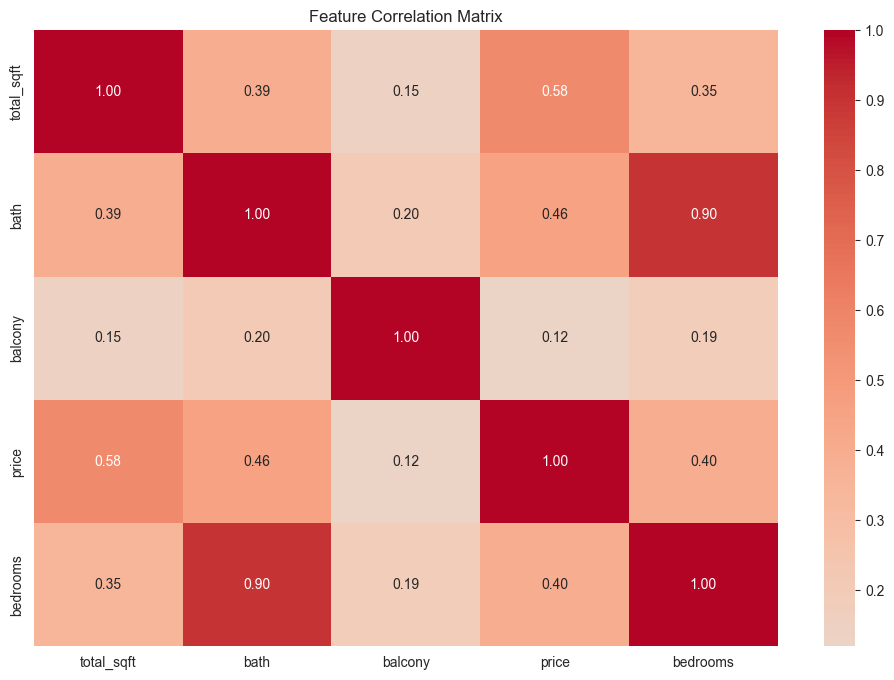

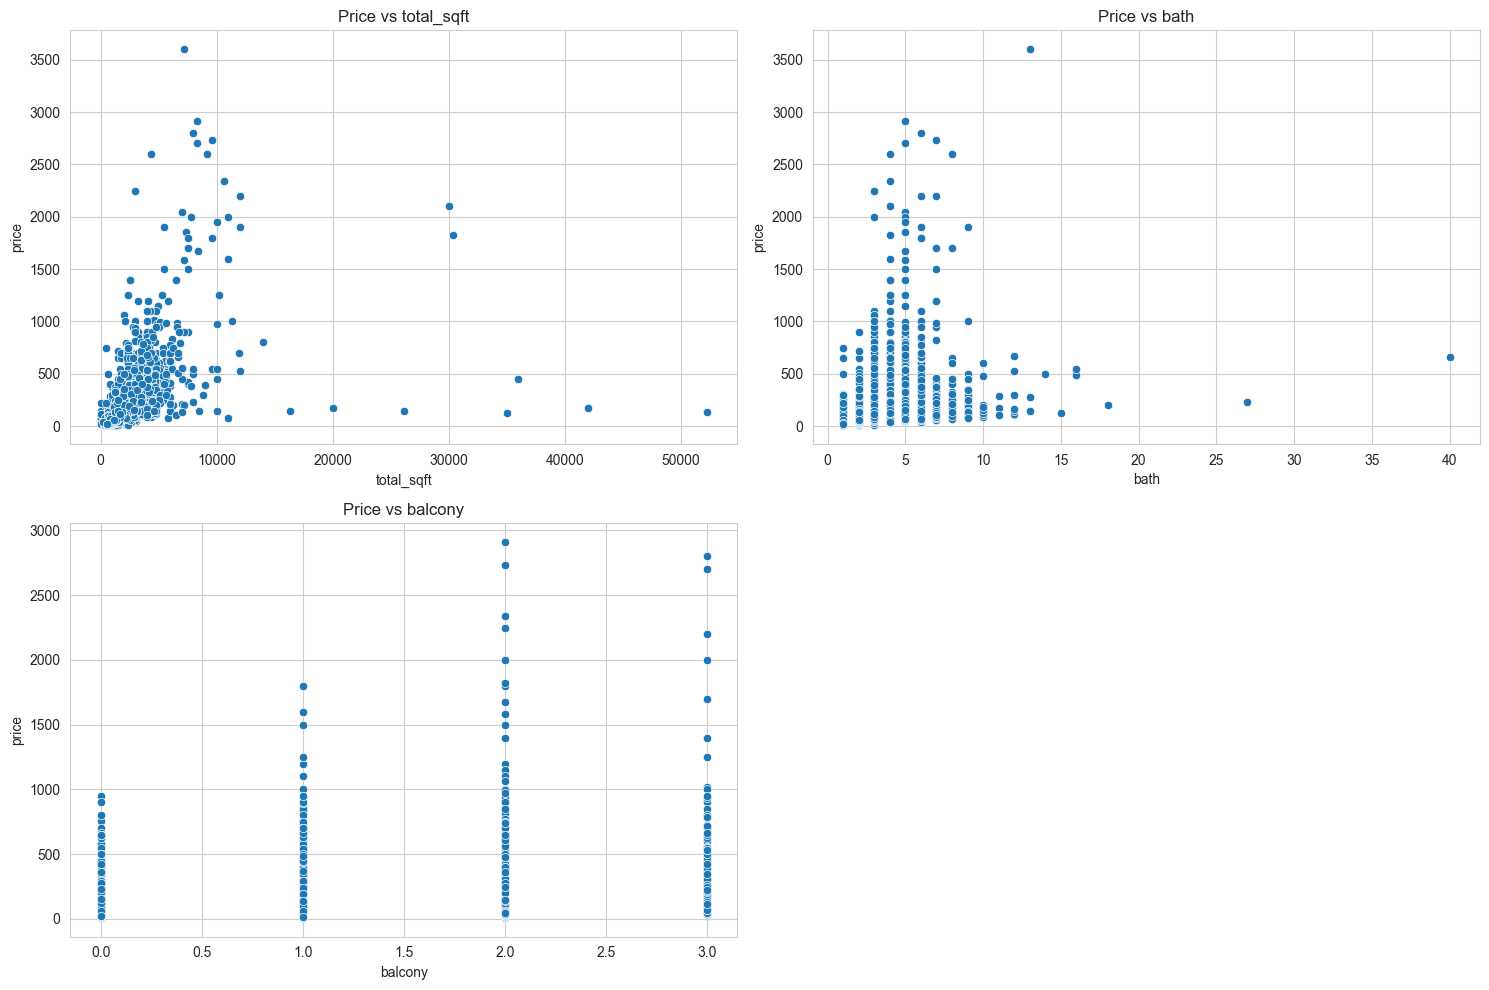

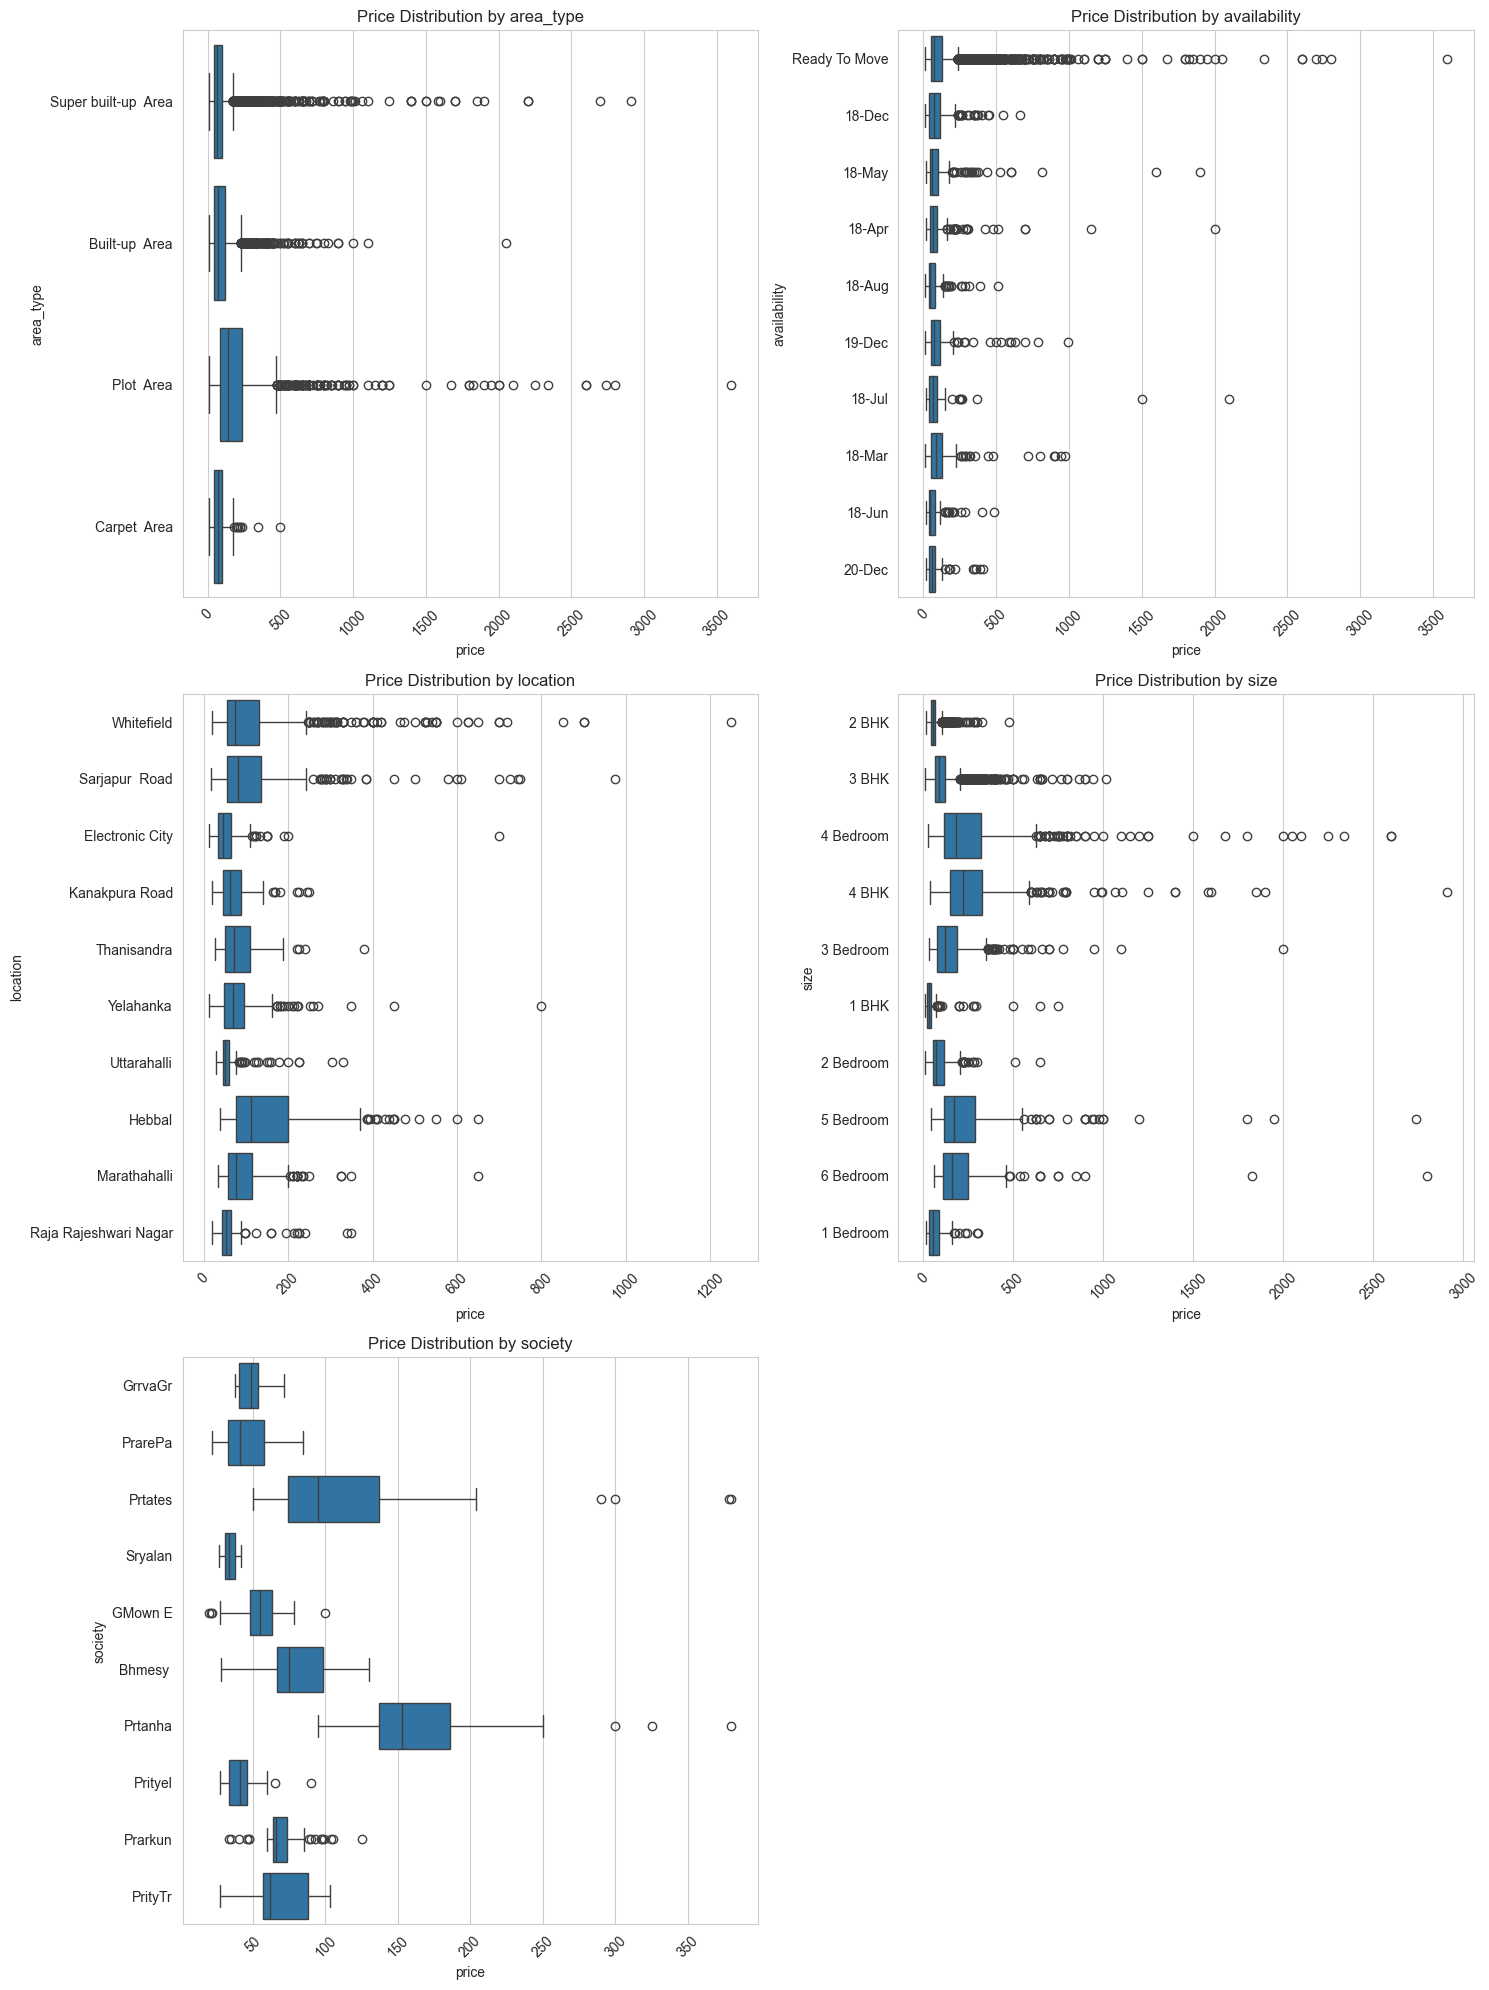

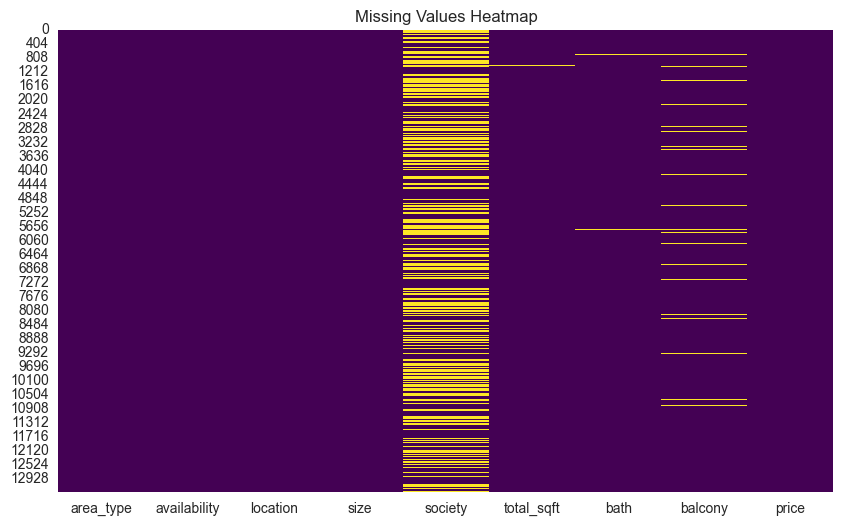


Missing Values Summary:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft        46
bath              73
balcony          609
price              0
dtype: int64


In [3]:
#Type your code here
# 4.1 Target Variable Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Housing Prices (in Lakhs)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 4.2 Handle total_sqft conversion
def convert_sqft(x):
    try:
        if isinstance(x, str) and '-' in x:
            low, high = map(float, x.split('-'))
            return (low + high) / 2
        return float(x)
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

# 4.3 Numerical Features Analysis
num_cols = ['total_sqft', 'bath', 'balcony']
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 4.4 Categorical Features Analysis
cat_cols = ['area_type', 'availability', 'location', 'size', 'society']

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 only
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 4.5 Correlation Analysis
def preprocess_for_correlation(df):
    temp_df = df.copy()

    # Handle total_sqft
    temp_df['total_sqft'] = temp_df['total_sqft'].apply(
        lambda x: np.mean(list(map(float, x.split('-'))) if isinstance(x, str) and '-' in x
        else float(x) if str(x).replace('.','',1).isdigit()
        else np.nan
    ))

    # Convert categorical variables
    for col in ['area_type', 'availability', 'location', 'society']:
        temp_df[col] = temp_df[col].astype('category').cat.codes

    # Extract bedroom count from size
    temp_df['bedrooms'] = temp_df['size'].str.extract('(\d+)').astype(float)

    return temp_df

temp_df = preprocess_for_correlation(df)
plt.figure(figsize=(12, 8))
numerical_features = temp_df.select_dtypes(include=['float64','int64'])
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# 4.6 Price vs Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

# 4.7 Price vs Categorical Features
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df['price'], y=df[col],
               order=df[col].value_counts().index[:10])  # Top 10 only
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.8 Missing Values Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

print("\nMissing Values Summary:")
print(df.isnull().sum())


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# 5.1 Handle Missing Values
print("Before handling missing values:")
print(df.isnull().sum())

# Fill numerical missing values with median
num_cols = ['total_sqft', 'bath', 'balcony']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
cat_cols = ['area_type', 'availability', 'location', 'size', 'society']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nAfter handling missing values:")
print(df.isnull().sum())

# 5.2 Feature Engineering
# Extract numerical value from size (e.g., "2 BHK" -> 2)
df['bedrooms'] = df['size'].str.extract('(\d+)').astype(float)
df.drop('size', axis=1, inplace=True)

# Convert total_sqft to numerical (handle ranges like "1000-1500")
def convert_sqft(x):
    if isinstance(x, str) and '-' in x:
        low, high = map(float, x.split('-'))
        return (low + high) / 2
    try:
        return float(x)
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df['total_sqft'].fillna(df['total_sqft'].median(), inplace=True)

# Create price per sqft feature
df['price_per_sqft'] = df['price'] / df['total_sqft']

# 5.3 Outlier Handling
# Remove properties with extremely low or high price per sqft
lower_limit = df['price_per_sqft'].quantile(0.01)
upper_limit = df['price_per_sqft'].quantile(0.99)
df = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

# 5.4 Encode Categorical Variables
# For society, we'll use only top N societies and group others as 'Other'
top_societies = df['society'].value_counts().head(10).index
df['society'] = df['society'].apply(lambda x: x if x in top_societies else 'Other')

# Similarly for location
top_locations = df['location'].value_counts().head(20).index
df['location'] = df['location'].apply(lambda x: x if x in top_locations else 'Other')

# 5.5 Prepare Features and Target
X = df.drop('price', axis=1)
y = df['price']

# 5.6 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.7 Create Preprocessing Pipeline
# Numerical features pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
num_features = ['total_sqft', 'bath', 'balcony', 'bedrooms', 'price_per_sqft']
cat_features = ['area_type', 'availability', 'location', 'society']

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# 5.8 Apply Preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nPreprocessing completed!")
print(f"Training set shape after preprocessing: {X_train_processed.shape}")
print(f"Test set shape after preprocessing: {X_test_processed.shape}")

Before handling missing values:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft        46
bath              73
balcony          609
price              0
dtype: int64

After handling missing values:
area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

Preprocessing completed!
Training set shape after preprocessing: (10441, 119)
Test set shape after preprocessing: (2611, 119)
